In [1]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

2024-06-13 19:43:40.497264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-13 19:43:40.497293: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [4]:
import keras
from keras import layers

encoding_dim = 32  # Size of our encoded representations 

input_img = keras.Input(shape=(x_train.shape[1],))                   # Input image
encoded = layers.Dense(256, activation='relu')(input_img)   # "encoded" is encoded representation of  input
encoded = layers.Dense(128, activation='relu')(encoded)   # "encoded" is encoded representation of  input

encoded = layers.Dense(encoding_dim, activation='relu')(encoded)   # "encoded" is encoded representation of  input

decoded = layers.Dense(128, activation='relu')(encoded)   # "encoded" is encoded representation of  input
decoded = layers.Dense(256, activation='relu')(decoded)   # "encoded" is encoded representation of  input


decoded = layers.Dense(784, activation='sigmoid')(decoded)           # "decoded" is lossy reconstruction of  input
autoencoder = keras.Model(input_img, decoded)                        # This model maps an input to its reconstruction

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary(0)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

2024-06-13 19:43:45.370835: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-13 19:43:45.370885: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-13 19:43:45.370918: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lenovo-Lenovo-ideapad-320-15IKB): /proc/driver/nvidia/version does not exist
2024-06-13 19:43:45.372168: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 0.3576 - val_loss: 0.3119
Epoch 2/10
235/235 [==============================] - 7s 30ms/step - loss: 0.3024 - val_loss: 0.3032
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.2948 - val_loss: 0.2941
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2901 - val_loss: 0.2904
Epoch 5/10
235/235 [==============================] - 7s 29ms/step - loss: 0.2867 - val_loss: 0.2875
Epoch 6/10
235/235 [==============================] - 7s 31ms/step - loss: 0.2843 - val_loss: 0.2857
Epoch 7/10
235/235 [==============================] - 8s 35ms/step - loss: 0.2823 - val_loss: 0.2837
Epoch 8/10
235/235 [==============================] - 7s 30ms/step - loss: 0.2808 - val_loss: 0.2826
Epoch 9/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2795 - val_loss: 0.2812
Epoch 10/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2783 - val_lo

In [6]:
x_testr = keras.Model(input_img, encoded)            # This model maps an input to its encoded representation
encoded_input = keras.Input(shape=(encoding_dim,))   # This is our encoded (32-dimensional) input

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the decoder model
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

NameError: name 'decoder_layer' is not defined

Encoded representations


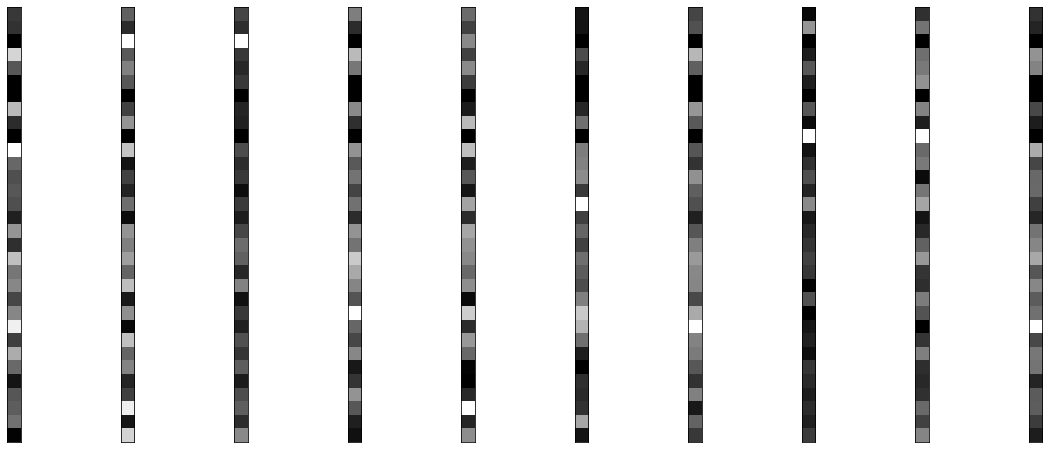

In [34]:
encoder = keras.Model(input_img, encoded)           # This model maps an input to its encoded representation
encoded_imgs = encoder.predict(x_test)              # This is our encoded (32-dimensional) input

print('Encoded representations')
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((1, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
